<a href="https://www.kaggle.com/code/mohamedyosef101/get-into-deep-learning-with-pytorch-ann-cnn?scriptVersionId=162538015" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# PyTorch 101
PyTorch is everywhere in academic papers, economics, healthcare, **Reinforcement Learning** (*my area of research*), and many more. So, maybe I'm not the right person to motivate you to learn PyTorch but anyway I'll teach you!

In [1]:
import torch
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns 

# style
sns.set()

# outcome
print(f"Last run at {dt.datetime.now()}")

Last run at 2024-02-11 19:06:57.746848


In [2]:
# check the device 
torch.cuda.is_available()

True

To turn on you `cuda` or GPU, 
1. click the menu button with three vertical dots in the top right corner of the screen
2. under accelerator click GPU
and it's done!

---

# <span style="font-family: freestyle script; font-size: 130%;">Concept 1. </span> <span style="font-size: 120%">What a tensor is...</span>

Before going to the coding, I want you to understand the concept of tensor and not just the concept and I also want to you visualize the tensors in your brain.

**Tensors:** an n-dimensional arrary of numbers (where n can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector).

> *The word tensor comes form an old latin word which means to stretch.*

<div align="center">
  <img width="180" src="https://i.ibb.co/bdJ4Xyj/3-axis-numpy.png">
  <img width="188" src="https://i.ibb.co/pxZFrM8/3-axis-front.png">
  <img width="120" src="https://i.ibb.co/rxp1Gdm/3-axis-block.png">
</div>

**NOTE** the terms matrix and tensor are often used interchangably.

<div><br></div>

*more resources:*

- Dan Fleisch. (2011). [*What's a Tensor?*](https://youtu.be/f5liqUk0ZTw?si=eoUM7IJ8PbYyvK1I). YouTube.

- TensorFlow Core. [*Introduction to Tensors*](https://www.tensorflow.org/guide/tensor)





<h2 style="background:#00373E; color: #E3EEFC; border-radius: 4px; padding: 8px 32px;">"Types" of tensors</h2>

<div align="center"><img alt="types of tensors" src="https://hadrienj.github.io/assets/images/2.1/scalar-vector-matrix-tensor.png" width="360"></div>

In [3]:
# scalar contains a single value, and no "axes"
scalar = torch.tensor(4)
print(f"scalar is a rank-{scalar.ndim} tensor")

scalar is a rank-0 tensor


![scalar](https://i.ibb.co/vQwMrQK/scalar.png)

In [4]:
# Vector is like a list of values and has one axis
vector = torch.tensor([2.0, 3.0, 4.0])
print(f"vector is a rank-{vector.ndim} tensor")

vector is a rank-1 tensor


![vector](https://i.ibb.co/9YWmdZw/vector.png)

In [5]:
# Matrix has two axes (also can be more)
matrix = torch.tensor([[1, 2],
                      [3, 4],
                      [5, 6]])
print(f"matrix is a rank-{matrix.ndim} tensor")

matrix is a rank-2 tensor


![matrix](https://i.ibb.co/NLwfK1m/matrix.png)

In [6]:
# Rank-3 tensor with tree axes
numbers = torch.tensor([
    [[0, 1, 3, 3, 4],
     [5, 6, 7, 8, 9]],

    [[10, 11, 12, 13, 14],
     [15, 16, 17, 18, 19]],

    [[20, 21, 22, 23, 24],
     [25, 26, 27, 28, 29]]
])

print(f"numbers is a rank-{numbers.ndim} tensor with shape {np.array(numbers.shape)}")

numbers is a rank-3 tensor with shape [3 2 5]


There are many ways to visualize this tensor:
<div align="left">
  <img width="180" src="https://i.ibb.co/bdJ4Xyj/3-axis-numpy.png">
  <img width="188" src="https://i.ibb.co/pxZFrM8/3-axis-front.png">
  <img width="120" src="https://i.ibb.co/rxp1Gdm/3-axis-block.png">
</div>

<h2 style="background:#00373E; color: #E3EEFC; border-radius: 4px; padding: 8px 32px;"> Random, Zeros, Ones, range, and like Tensors</h2>


In [7]:
# create a random tensor of size (2, 3)
rand_MATRIX = torch.rand(size=(2,3))
rand_MATRIX

tensor([[0.2700, 0.4819, 0.3666],
        [0.5975, 0.0062, 0.7935]])

In [8]:
# create a tensor of all zeros
zeros_TENSOR = torch.zeros(size=(2, 1, 3))
zeros_TENSOR

tensor([[[0., 0., 0.]],

        [[0., 0., 0.]]])

In [9]:
# create a torch of all ones
ones_M = torch.ones(size=(2, 2))
ones_M

tensor([[1., 1.],
        [1., 1.]])

In [10]:
# create a range of numbers from 1996 to 2030 with tensors
years = torch.arange(start=1996, step=1, end=2031)
years

tensor([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
        2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
        2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030])

In [11]:
# a tensor like "years" but with all values of 1
years_prob = torch.ones_like(input=years)
years_prob

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

---

# <span style="font-family: freestyle script; font-size: 130%;">Concep 2.</span> <span style="font-size: 120%">Neural Network</span>
I think you know what a neural network is.. But if you don't, give a look to the following playlist $\downarrow$
- Grant Sanderson. (2017). [*Neural Networks, Deep Learning*](https://youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&si=ieGLDzRU2Ln9L0RO). YouTube.

### """
## The best way to learn is by doing, so let's get it done!
### """

<h2 style="background:#00373E; color: #E3EEFC; border-radius: 4px; padding: 8px 32px;">2.1_ Import Libraries</h2>

In [12]:
import torch # I know I've already import it before 
from torch import nn
from torch.autograd import Variable as var
from torch.utils.data import DataLoader as dl
import pandas as pd
from sklearn.model_selection import train_test_split as tts

print("It's done!")

It's done!


From now on, I want you to get into the habbit of reading documentation and know that **the more you read the more you grow**. 

<h2 style="background:#00373E; color: #E3EEFC; border-radius: 4px; padding: 8px 32px;">2.2_ Data Preparation</h2>

<div align="center">
    <img alt="sample of the data"
         src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*Ft2rLuO82eItlvJn5HOi9A.png"
         width="560">
    <div>
        <span>sample of the dataset</span>
    </div>
</div>

In [13]:
# load data
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv", dtype = np.float32)

# split data into features "X" (image pixels) and labels (0 to 9)
np_targets = train.label.values
np_features = train.loc[:, train.columns != "label"]

np_features = np_features.values/255 # Normalize features

train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# split 80% for train and 20% for test
X_train, X_test, y_train, y_test = tts(np_features,
                                      np_targets,
                                      test_size=0.2,
                                      random_state=42)

In [15]:
#Put data in tensors
Xtrain = torch.from_numpy(X_train)
Xtest = torch.from_numpy(X_test)

ytrain = torch.from_numpy(y_train).type(torch.LongTensor)
ytest = torch.from_numpy(y_test).type(torch.LongTensor)

In [16]:
# PyTorch train and test datasets
train = torch.utils.data.TensorDataset(Xtrain, ytrain)
test = torch.utils.data.TensorDataset(Xtest, ytest)

In [17]:
# Data Loader DL
train_loader = dl(train, 
                 batch_size=100,
                 shuffle=False)

test_loader = dl(test,
                batch_size=100,
                shuffle=False)

If you don't understand what a DataLoader is, check this: 
- Tongzhou Wang. (Nov 2019). [*Dataloader Design for PyTorch*](https://youtu.be/sCsPzVumtR8?si=3M7Z3ktjLt37F-Kw). PyTorch core talks.


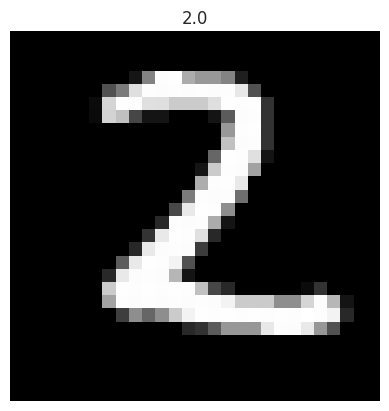

In [18]:
# visualize one image in the data
plt.imshow(np_features[101].reshape(28,28), cmap='gray')
plt.axis("off")
plt.title(str(np_targets[101]))
plt.show()

<h2 style="background:#00373E; color: #E3EEFC; border-radius: 4px; padding: 8px 32px;">2.3_ Build NN Model</h2>

<div align="center">
    <img src="https://i.imgur.com/ywMFtDz.png" width="560">
</div>

In [19]:
class ANNModel(nn.Module): 
    
    ### Define Network Architecture ###
    def __init__(self, input_dim, hidden_dim, output_dim):
        
        super(ANNModel, self).__init__()
        # super function inherits from nn.Module 
        # and can access everything in it.
        
        # Input Layer 
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.act1 = nn.ReLU() # Activation function
        
        # 2 hidden layers 
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.act2 = nn.Tanh()
        
        self.layer3 = nn.Linear(hidden_dim, hidden_dim)
        self.act3 = nn.ELU() 
        
        # Output Layer
        self.layer4 = nn.Linear(hidden_dim, output_dim)
        
    ### Define Forward Pass ###
    def forward(self, x): 
        
        # layer 1
        out = self.layer1(x)
        out = self.act1(out)
        
        # layer 2
        out = self.layer2(out)
        out = self.act2(out)
        # layer 3
        out = self.layer3(out)
        out = self.act3(out)
        # layer 4
        out = self.layer4(out)
        
        return out
    
print("NN Model has been defined!")

NN Model has been defined!


In [20]:
# set the parameters
input_dim = 28*28 # the size of the image
hidden_dim = 150 # open for experiment but 150 as a start
output_dim = 10 # number of classes (from 0 to 9)

batch_size = 100
n_iterations = 10000
num_epochs = n_iterations / (len(X_train) / batch_size)
num_epochs = int(num_epochs)

# Create the model
model = ANNModel(input_dim, hidden_dim, output_dim)

More about paramerters $\downarrow$
* Misra Turp. (oct 2022). [All Hyperparameters of a Neural Network Explained
](https://youtu.be/r2TvNmAxiCU?si=uHO35u4X9jUlnvUi). YouTube.

In [21]:
### Set loss, optimizer, and Learning rate ###

# loss function -> CrossEnropy (check pytorch docs)
error = nn.CrossEntropyLoss() 

# Learning rate 
learning_rate = 0.02 #(just as a start)

# optimizer -> Stochastic gradient decent (SGD)
optim = torch.optim.SGD(model.parameters(),
                       lr= learning_rate)

Take a look at: 
* Misra Turp. (oct 2022). [Which Loss Function, Optimizer and LR to Choose for Neural Networks](https://youtu.be/KI5gOnlQeN8?si=KTc_d8USTuGXtuu-). YouTube.

<h2 style="background:#00373E; color: #E3EEFC; border-radius: 4px; padding: 8px 32px;">2.4_ Model Training</h2>

In [22]:
### Model training loop ###

# prepare for the loop 
count = 0
model_loss = []
iterations = []
model_accuracy = []

# start the loop 
for epoch in range(num_epochs): 
    
    for i, (images, labels) in enumerate(train_loader): 
        
        train = var(images.view(-1, 28*28))
        labels = var(labels) 
        
        # clear the gradients of the optimizer
        optim.zero_grad() 
        
        # forward propagation
        outputs = model(train)
        loss = error(outputs, labels)
        
        # backward propagation and update parameters
        loss.backward() 
        optim.step()
        
        count += 1
        
        if count % 50 == 0: 
            
            correct = 0 # correct predictions
            total = 0 # total number of labels
            
            # predict test dataset
            for images, labels in test_loader: 
                
                test = var(images.view(-1, 28*28))
                
                # forward
                outputs = model(test) 
                
                # get the maximum value of predictions
                predicted = torch.max(outputs.data, 1)[1]
                
                # total number of labels 
                total += len(labels) 
                
                # total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / float(total) 
            
            # store for the evaluation
            model_loss.append(loss.data)
            iterations.append(count) 
            model_accuracy.append(accuracy)
            
            if count % 500 == 0:
                print(f"Iteration: {count} Loss: {loss.data:.2f} | Accuracy: {accuracy:.2f}")

Iteration: 500 Loss: 0.82 | Accuracy: 77.64
Iteration: 1000 Loss: 0.47 | Accuracy: 87.50
Iteration: 1500 Loss: 0.22 | Accuracy: 89.75
Iteration: 2000 Loss: 0.30 | Accuracy: 90.63
Iteration: 2500 Loss: 0.30 | Accuracy: 92.01
Iteration: 3000 Loss: 0.13 | Accuracy: 92.71
Iteration: 3500 Loss: 0.26 | Accuracy: 93.55
Iteration: 4000 Loss: 0.06 | Accuracy: 93.98
Iteration: 4500 Loss: 0.32 | Accuracy: 94.46
Iteration: 5000 Loss: 0.09 | Accuracy: 94.77
Iteration: 5500 Loss: 0.19 | Accuracy: 94.90
Iteration: 6000 Loss: 0.20 | Accuracy: 95.30
Iteration: 6500 Loss: 0.09 | Accuracy: 95.55
Iteration: 7000 Loss: 0.13 | Accuracy: 95.81
Iteration: 7500 Loss: 0.11 | Accuracy: 95.86
Iteration: 8000 Loss: 0.18 | Accuracy: 95.87
Iteration: 8500 Loss: 0.07 | Accuracy: 96.13
Iteration: 9000 Loss: 0.06 | Accuracy: 96.24
Iteration: 9500 Loss: 0.02 | Accuracy: 96.27


<h2 style="background:#00373E; color: #E3EEFC; border-radius: 4px; padding: 8px 32px;">2.5_ Evaluation</h2>

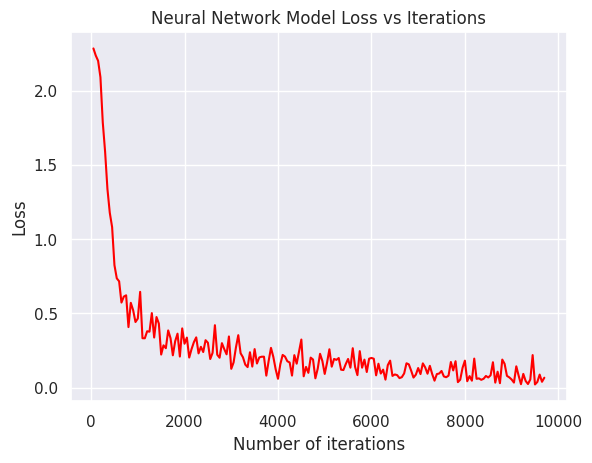

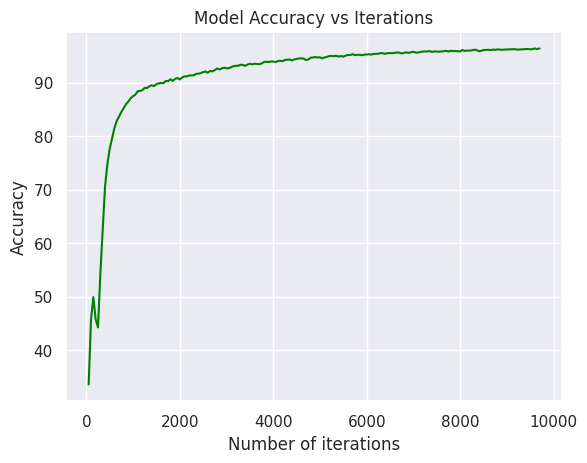

In [23]:
# visualize loss
plt.plot(iterations, model_loss, color="red")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.title("Neural Network Model Loss vs Iterations")
plt.show()

# visualize accuracy
plt.plot(iterations, model_accuracy, color="green")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")
plt.title("Model Accuracy vs Iterations")
plt.show()

---

# <span style="font-family: freestyle script; font-size: 130%;">Concept 3.</span> <span style="font-size: 120%">Convolutional Neural Network</span>

<br>

## **S** O O **N**